## Upload data set

In [2]:
setwd("C:/Users/student/Documents/Data Analysis Practice Data Sets")
getwd()
accident <- read.csv("Car Accident Data.csv", na.strings = c("","Unknown","Not Rep", "Unkno",NA))

str(accident)

colnames(accident)[1] <- "STATE"
accident$ST_CASE = NULL
accident$TRAV_SP <- as.numeric(accident$TRAV_SP)
accident$AGE <- as.numeric(accident$AGE)
accident$DAY <- as.factor(accident$DAY)

[1] "C:/Users/student/Documents/Data Analysis Practice Data Sets"

'data.frame':	80587 obs. of  28 variables:
 $ ï..STATE: Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ST_CASE : int  10001 10002 10003 10003 10004 10005 10005 10006 10006 10007 ...
 $ VEH_NO  : int  1 1 1 1 1 1 2 1 1 1 ...
 $ PER_NO  : int  1 1 1 2 1 1 1 1 2 1 ...
 $ COUNTY  : int  127 83 11 11 45 45 45 111 111 89 ...
 $ DAY     : int  1 1 1 1 4 7 7 8 8 8 ...
 $ MONTH   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ HOUR    : int  2 22 1 1 0 7 7 9 9 18 ...
 $ MINUTE  : int  40 13 25 25 57 9 9 59 59 33 ...
 $ AGE     : Factor w/ 103 levels "1","10","101",..: 68 47 28 16 38 20 60 64 12 82 ...
 $ SEX     : Factor w/ 2 levels "Female","Male": 2 2 2 1 2 2 2 2 2 2 ...
 $ PER_TYP : Factor w/ 11 levels "Bicyclist","Driver of a Motor Vehicle In-Transport",..: 2 2 2 6 2 2 2 2 6 2 ...
 $ INJ_SEV : Factor w/ 7 levels "Died Prior to Crash*",..: 2 2 2 6 2 2 4 2 4 2 ...
 $ SEAT_POS: Factor w/ 28 levels "Fourth Seat, Left Side",..: 6 6 6 9 6 6 6 6 9 6 ...

## Missing data

In [3]:
#Sum of missing values in the dataframe
sum(is.na(accident))

#Dataframe of number of missing values by variable
library(dplyr)
missing_data <- data.frame("variable" = colnames(accident),
                          "missing_values" = colSums(is.na(accident)))
missing_data <- filter(missing_data, missing_values != 0)
missing_data

#Initial Cleaning
accident$TRAV_SP = NULL
accident <- accident[!(is.na(accident$LATITUDE)) | !(is.na(accident$LONGITUD)),]

#Mode function
most_frequent <- function(x){
   unique_x <- unique(x)
   unique_x[which.max(tabulate(match(x, unique_x)))]
}

#Clean data with mean and mode
data_cleaning <- function(data)
{
  for (i in which(sapply(data, is.numeric))){
       data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE)
  } 
  for (i in which(sapply(data, is.factor))){
        data[is.na(data[,i]), i] <- most_frequent(data[,i])
    }
  invisible(return(data))
}

accident.mean.impute <- data_cleaning(accident)

#Only Complete Cases Data
only.complete <- accident[complete.cases(accident),]

#KNN Imputation method
# knn.impute <- preProcess(accident, method = "knnImpute")
# accident.knn.impute <- predict(knn.impute, newdata = accident)

# missing_data <- data.frame("variable" = colnames(accident.clean),
#                           "missing_values" = colSums(is.na(accident.clean)))
# missing_data <- filter(missing_data, missing_values != 0)
# missing_data

#Sum of missing values in cleaned dataframe (should equal 0)
sum(is.na(accident.mean.impute))

[1] 94403


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



variable,missing_values
MINUTE,377
AGE,1668
SEX,1358
INJ_SEV,770
SEAT_POS,716
MAN_COLL,7373
OWNER,8826
MOD_YEAR,8520
TRAV_SP,51419
DEFORMED,8574


[1] 0

## Variable Manipulation

In [4]:
no.manipulation <- accident.mean.impute

choice = 1
if (choice == 1){
  accident.clean <- accident.mean.impute
}else if (choice == 2){
  accident.clean <- only.complete
}

#Change target variable to binary
# levels(accident.clean$INJ_SEV)
accident.clean$INJ_SEV_new <- ifelse(accident.clean$INJ_SEV %in% c("Fatal Injury (K)"), "Fatal", "Not Fatal")
accident.clean$INJ_SEV_new <- as.factor(accident.clean$INJ_SEV_new)
accident.clean$INJ_SEV = NULL

no.manipulation$INJ_SEV_new <- ifelse(no.manipulation$INJ_SEV %in% c("Fatal Injury (K)"), "Fatal", "Not Fatal")
no.manipulation$INJ_SEV_new <- as.factor(no.manipulation$INJ_SEV_new)
no.manipulation$INJ_SEV = NULL

#Reduce levels of Seat Position 
# levels(accident.clean$SEAT_POS)
# accident.clean$SEAT_POS_new <- ifelse((substr(accident.clean$SEAT_POS,1,5) %in% c("Front")), "Front",
#                                   ifelse((substr(accident.clean$SEAT_POS,1,6) %in% c("Second")), "Second",
#                                   ifelse((substr(accident.clean$SEAT_POS,1,5) %in% c("Third")), "Third",
#                                   ifelse((substr(accident.clean$SEAT_POS,1,6) %in% c("Fourth")),"Fourth", "Other"))))
# accident.clean$SEAT_POS_new <- as.factor(accident.clean$SEAT_POS_new)
# accident.clean$SEAT_POS = NULL

#Reduce levels of Model Year 
accident.clean$MOD_YEAR_new[accident.clean$MOD_YEAR < 1990] <- "Before 1990"
accident.clean$MOD_YEAR_new[accident.clean$MOD_YEAR >= 1990 & accident.clean$MOD_YEAR < 2000] <- "1990 to 1999"
accident.clean$MOD_YEAR_new[accident.clean$MOD_YEAR >= 2000 & accident.clean$MOD_YEAR < 2010] <- "2000 to 2009"
accident.clean$MOD_YEAR_new[accident.clean$MOD_YEAR >= 2010] <- "2010 and Later"
accident.clean$MOD_YEAR_new <- as.factor(accident.clean$MOD_YEAR_new)
accident.clean$MOD_YEAR =NULL

# #Reduce levels of Age 
accident.clean$AGE_new[accident.clean$AGE <= 20] <- "Under 20"
accident.clean$AGE_new[accident.clean$AGE <= 40 & accident.clean$AGE > 20] <- "21 to 40"
accident.clean$AGE_new[accident.clean$AGE <= 60 & accident.clean$AGE > 40] <- "41 to 60"
accident.clean$AGE_new[accident.clean$AGE <= 80 & accident.clean$AGE > 60] <- "61 to 80"
accident.clean$AGE_new[accident.clean$AGE > 80] <- "Over 80"
accident.clean$AGE_new <- as.factor(accident.clean$AGE_new)
accident.clean$AGE = NULL

#Reduce levels of Weather
accident.clean$WEATHER_new <- ifelse(accident.clean$WEATHER == "Clear", "Clear", "Not Clear")
accident.clean$WEATHER_new <- as.factor(accident.clean$WEATHER_new)
accident.clean$WEATHER = NULL

#Reduce levels of Months
accident.clean$MONTH_new[accident.clean$MONTH %in% c("January","February", "December")] <- "Winter"
accident.clean$MONTH_new[accident.clean$MONTH %in% c("March","April", "May")] <- "Spring"
accident.clean$MONTH_new[accident.clean$MONTH %in% c("June","July", "August")] <- "Summer"
accident.clean$MONTH_new[accident.clean$MONTH %in% c("September","October", "November")] <- "Fall"
accident.clean$MONTH_new <- as.factor(accident.clean$MONTH_new)
accident.clean$MONTH = NULL

#Reduce levels of Hour
accident.clean <- accident.clean[which(accident.clean$HOUR <= 24),]
accident.clean$HOUR_new[accident.clean$HOUR >=22 | accident.clean$HOUR < 2] <- "Late Night"
accident.clean$HOUR_new[accident.clean$HOUR >=2 & accident.clean$HOUR < 6] <- "Early Morning"
accident.clean$HOUR_new[accident.clean$HOUR >=6 & accident.clean$HOUR < 10] <- "Morning"
accident.clean$HOUR_new[accident.clean$HOUR >=10 & accident.clean$HOUR < 14] <- "Afternoon"
accident.clean$HOUR_new[accident.clean$HOUR >=14 & accident.clean$HOUR < 18] <- "Mid Afternoon"
accident.clean$HOUR_new[accident.clean$HOUR >=18 & accident.clean$HOUR < 22] <- "Evening"
accident.clean$HOUR_new <- as.factor(accident.clean$HOUR_new)
accident.clean$HOUR = NULL

#Reduce levels of states
# levels(accident$STATE)
# accident.clean$REGION[accident.clean$STATE %in% c("Connecticut","Maine","Massachusetts","New Hampshire",
#                                                      "Rhode Island","Vermont","New Jersey","New York",
#                                                      "Pennsylvania")] <- "Northeast"
# accident.clean$REGION[accident.clean$STATE %in% c("Indiana","Illinois","Michigan","Ohio","Wisconsin",
#                                                      "Iowa","Kansas","Minnesota","Missouri","Nebraska",
#                                                      "North Dakota","South Dakota")] <- "Midewest"
# accident.clean$REGION[accident.clean$STATE %in% c("Delaware","Dist of Columbia","Florida","Georgia",
#             "Maryland","North Carolina","South Carolina","Virginia",
#             "West Virginia","Alabama","Kentucky","Mississippi",
#             "Tennessee","Arkansas","Louisiana","Oklahoma","Texas")] <- "South"
# accident.clean$REGION[accident.clean$STATE %in% c("Arizona","Colorado","Idaho","New Mexico","Montana",
#             "Utah","Nevada","Wyoming","Alaska","California",
#             "Hawaii","Oregon","Washington")] <- "West"
# accident.clean$REGION <- as.factor(accident.clean$REGION)
# accident.clean$STATE = NULL

#Standardize Number of Vehicles
# accident.clean$VEH_NO_STAND <- (accident.clean$VEH_NO - mean(accident.clean$VEH_NO)) / sd(accident.clean$VEH_NO)
# accident.clean$VEH_NO = NULL

#Log Transformation on Number of Vehicles
# accident.clean$VEH_NO_LOG <- log(accident.clean$VEH_NO)
# accident.clean$VEH_NO = NULL

# str(accident.clean)
# sum(is.na(accident.clean))

## Data Visualization & Exploration

### Summary Statistics & Distributions

            STATE           VEH_NO           PER_NO           COUNTY      
 Texas         : 8273   Min.   : 0.000   Min.   : 1.000   Min.   :  1.00  
 California    : 7552   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 31.00  
 Florida       : 7062   Median : 1.000   Median : 1.000   Median : 71.00  
 Georgia       : 3284   Mean   : 1.392   Mean   : 1.632   Mean   : 92.05  
 North Carolina: 3088   3rd Qu.: 2.000   3rd Qu.: 2.000   3rd Qu.:115.00  
 Pennsylvania  : 2660   Max.   :58.000   Max.   :51.000   Max.   :840.00  
 (Other)       :47847                                                     
      DAY            MINUTE          SEX       
 3      : 2906   Min.   : 0.00   Female:26422  
 14     : 2877   1st Qu.:14.00   Male  :53344  
 6      : 2832   Median :29.00                 
 7      : 2742   Mean   :28.43                 
 5      : 2729   3rd Qu.:44.00                 
 25     : 2726   Max.   :59.00                 
 (Other):62954                                 
                

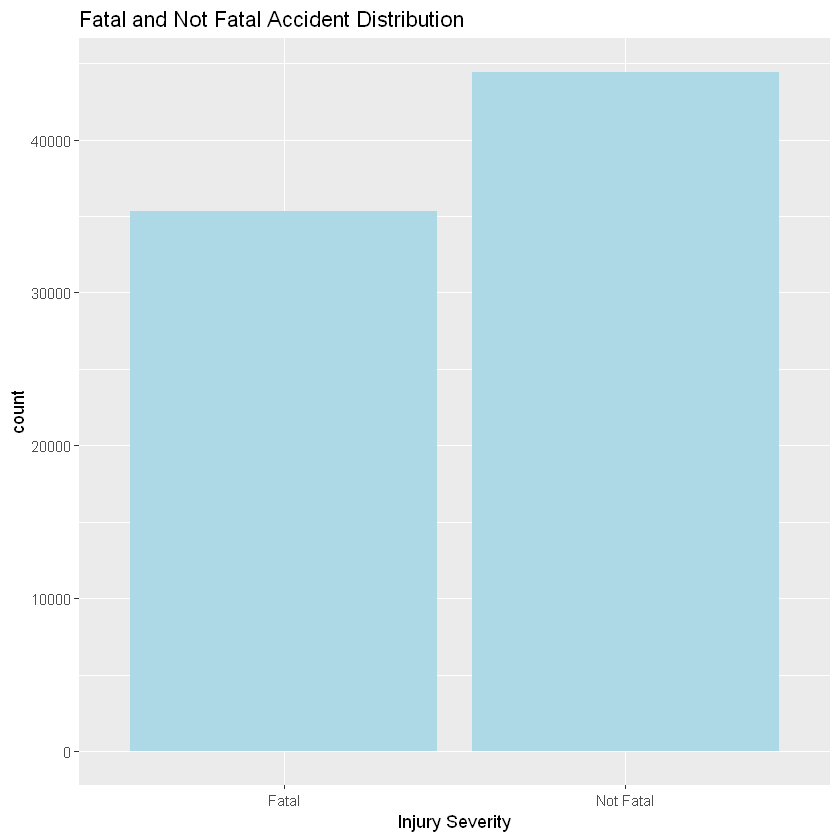

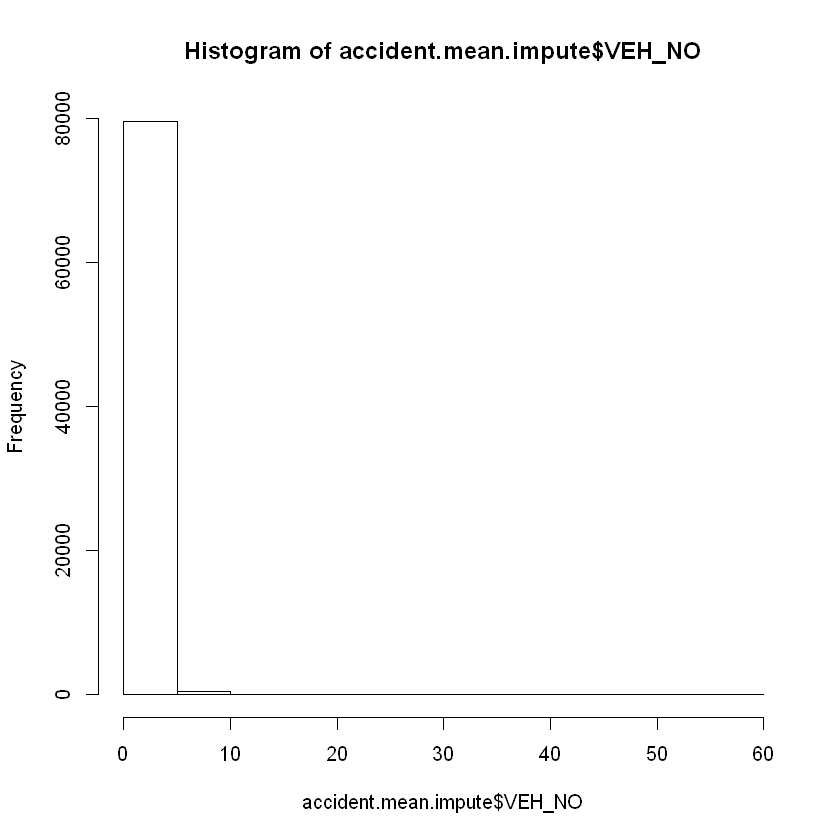

In [6]:
summary(accident.clean)

library(ggplot2)
ggplot(data=accident.clean) +
  geom_bar(mapping = aes(x=accident.clean$INJ_SEV), fill="lightblue") +
  xlab("Injury Severity") +
  ggtitle("Fatal and Not Fatal Accident Distribution")

hist(accident.mean.impute$VEH_NO)

### Heat Map Visualization

Loading required package: sp
rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/student/Documents/R/win-library/3.5/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/student/Documents/R/win-library/3.5/rgdal/proj
 Linking to sp version: 1.3-1 


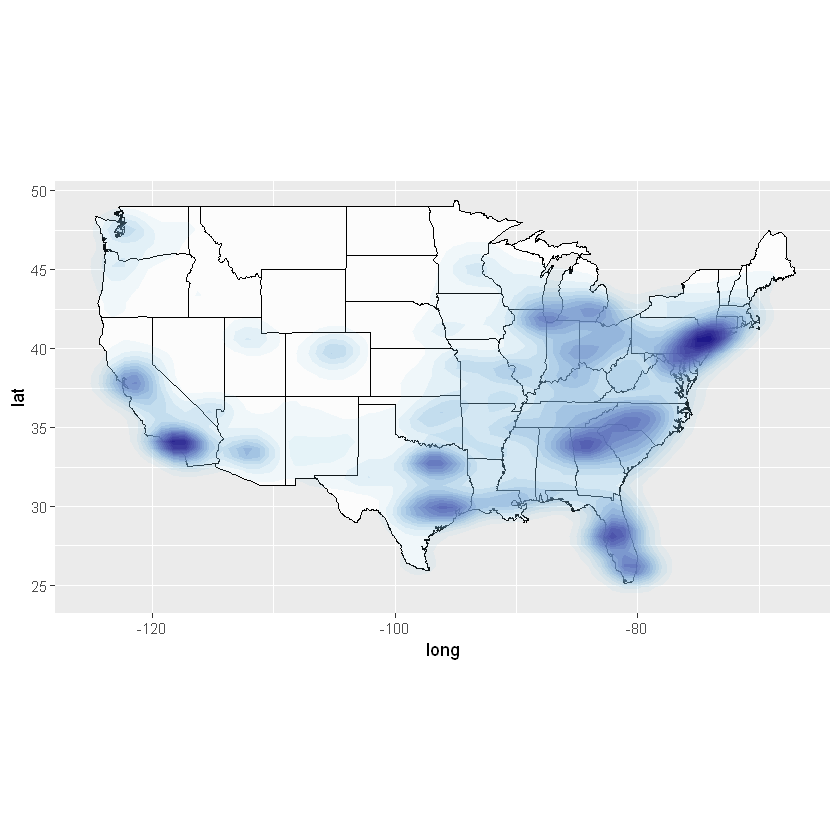

In [7]:
library(ggmap)
library(maps)
library(rgdal)

states <- map_data("state")
ggplot(data = states) + 
  geom_polygon(mapping = aes(x = long, y = lat, group = group), fill = "grey99", color = "black") + 
  coord_fixed(1.3) +
  guides(fill=FALSE)+
  stat_density2d(data = accident.clean, mapping = aes(x=LONGITUD, y=LATITUDE, 
                                                      fill =..level.., alpha =..level..), 
                 bins = 20, geom = "polygon") +
  scale_fill_gradient(low="skyblue", high="navyblue") +
  scale_alpha(range = c(0.1, 0.6), guide = FALSE)

### Chi Sqaure Tests & Balloonplot Visualization

Warning message in FUN(X[[i]], ...):
"Chi-squared approximation may be incorrect"Warning message in FUN(X[[i]], ...):
"Chi-squared approximation may be incorrect"

[[1]]

	Pearson's Chi-squared test with Yates' continuity correction

data:  X[[i]]
X-squared = 549.34, df = 1, p-value < 2.2e-16


[[2]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 9840, df = 10, p-value < 2.2e-16


[[3]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 8689.4, df = 3, p-value < 2.2e-16


[[4]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 3992.5, df = 9, p-value < 2.2e-16


[[5]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 3162.3, df = 6, p-value < 2.2e-16


[[6]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 7652.7, df = 4, p-value < 2.2e-16


[[7]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 18.677, df = 6, p-value = 0.004746


[[8]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 361.54, df = 5, p-value < 2.2e-16


[[9]]

	Pearson's Chi-squared test

data:  X[[i]]
X-squared = 248.68, df = 7, p-value < 2.2e-16


[[10]]

	Pearson's Chi-squared test with Yates' continuity correction

data:  X[[i]]


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



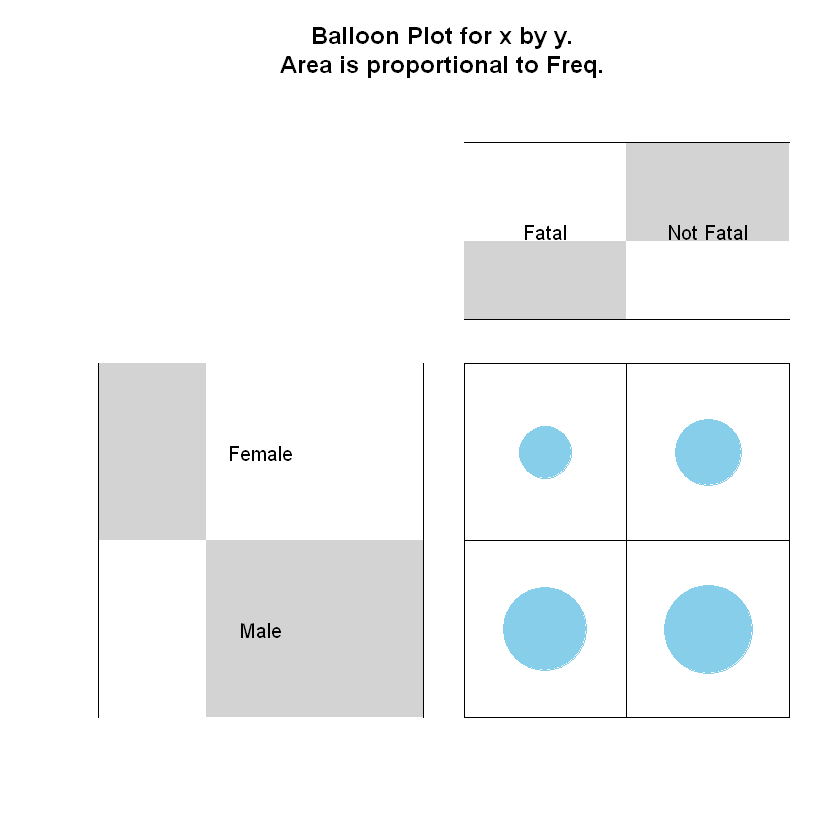

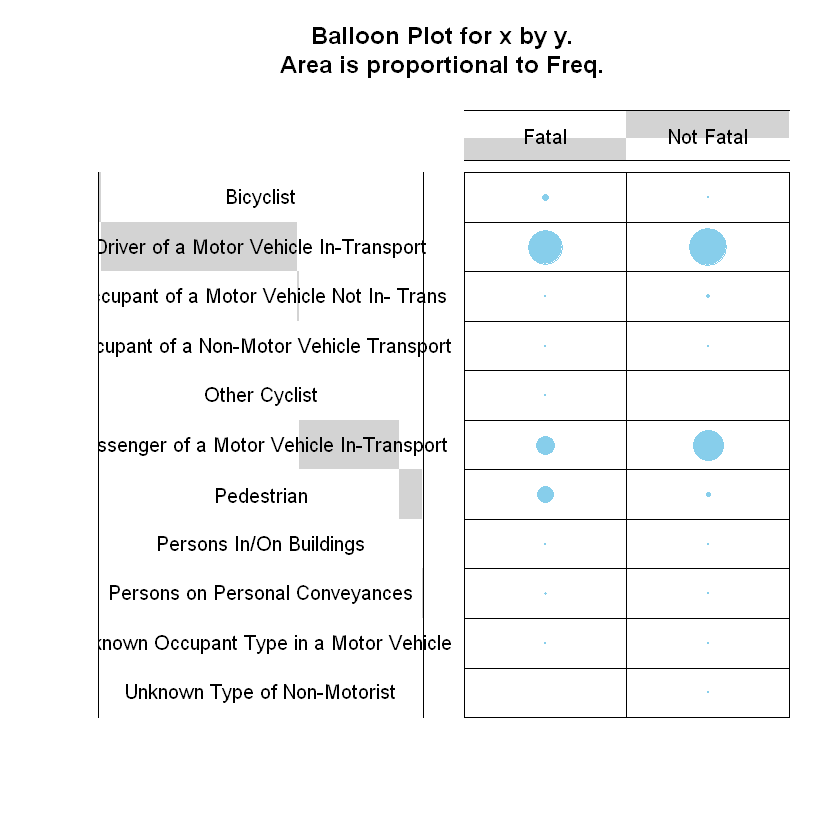

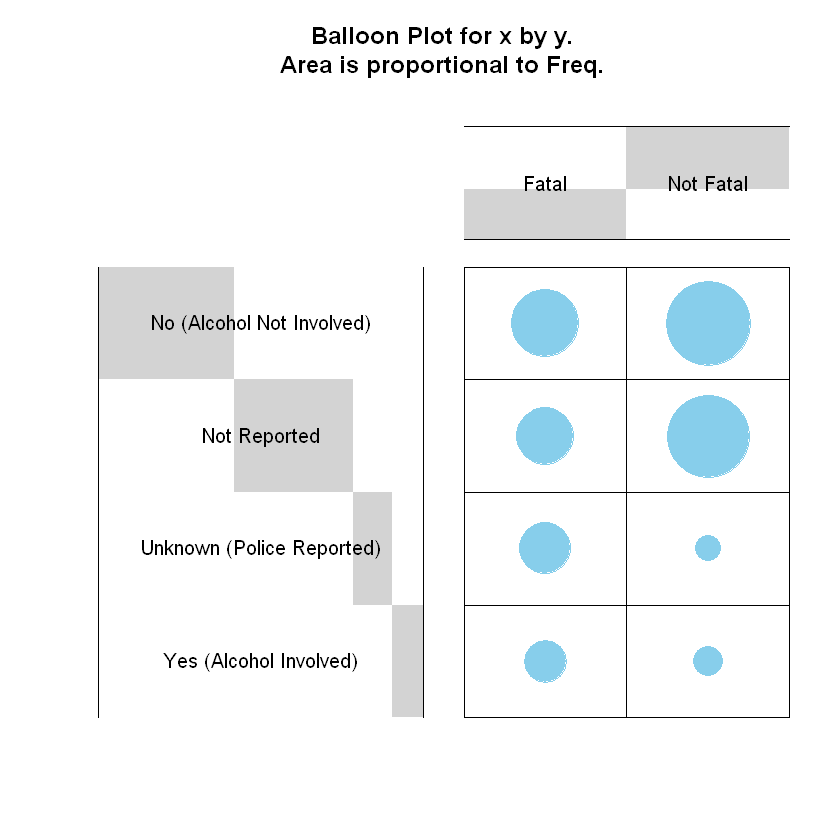

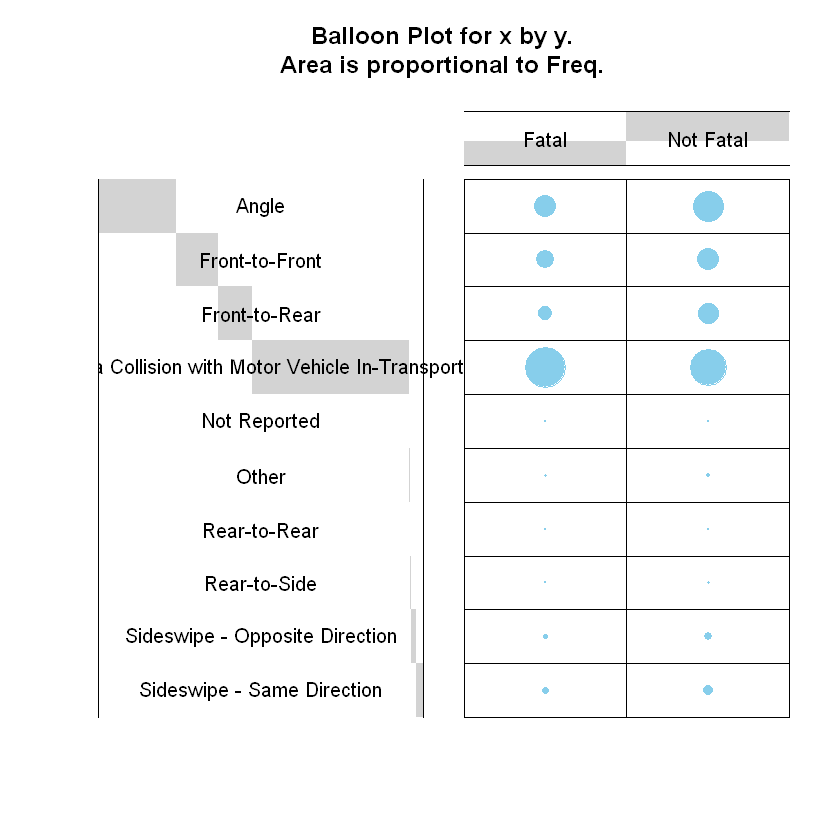

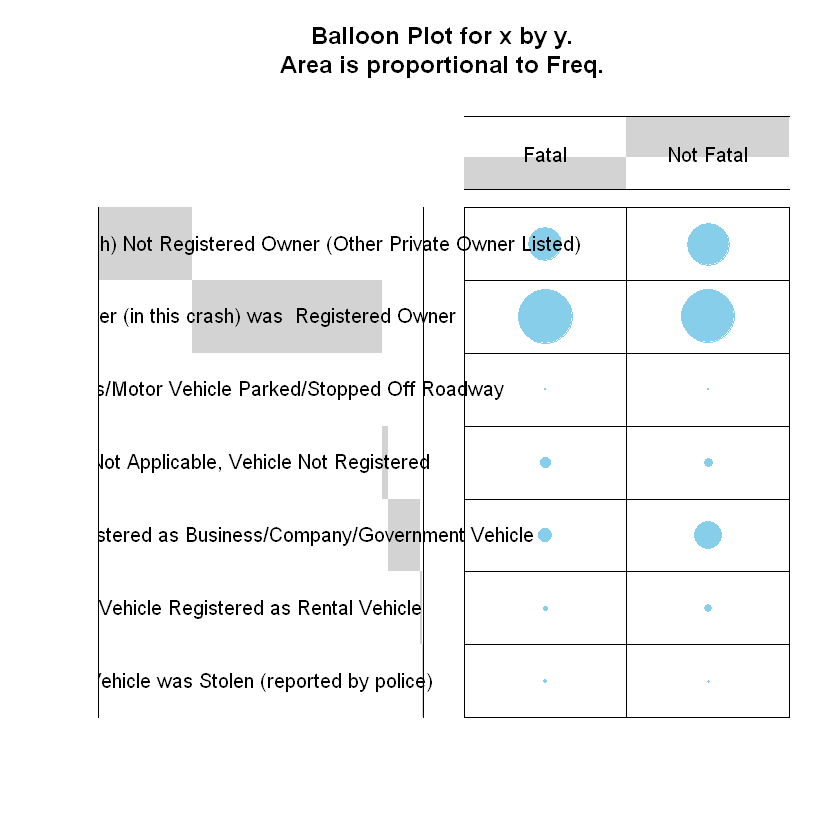

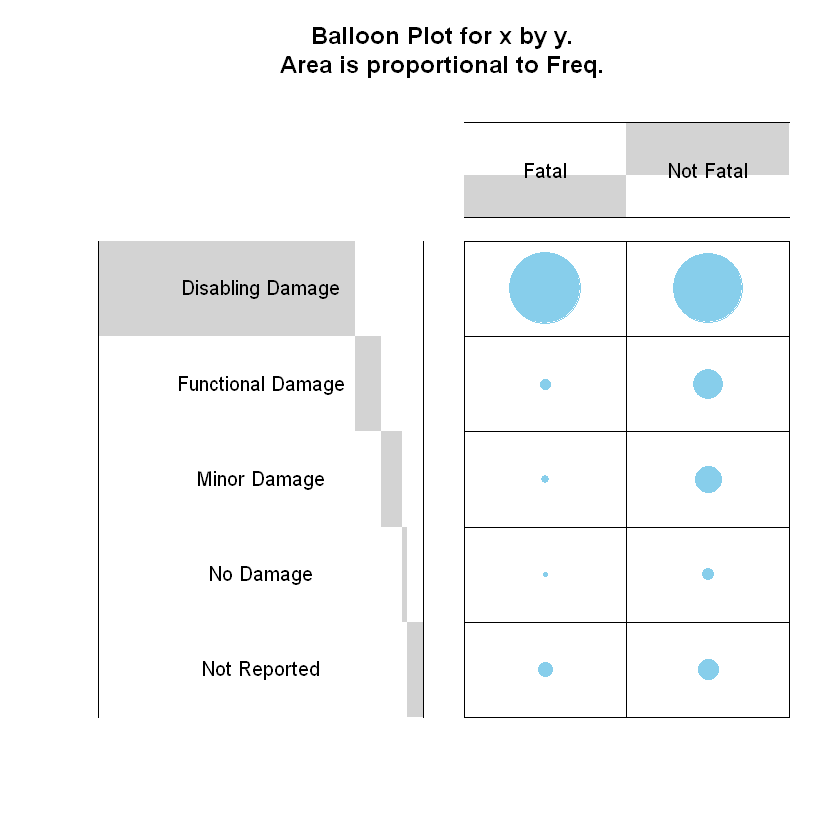

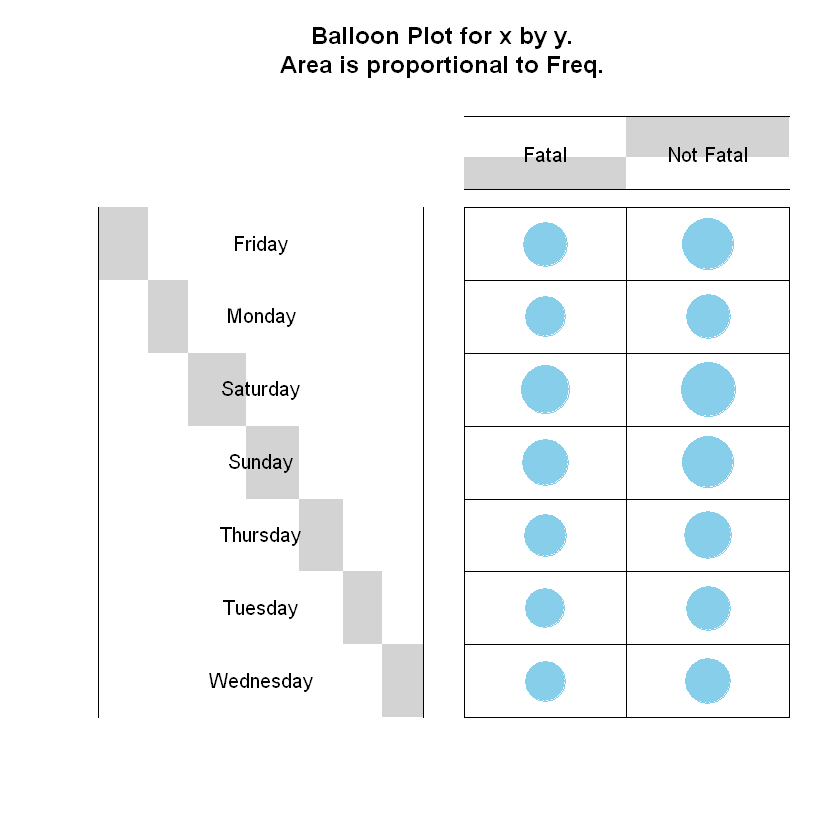

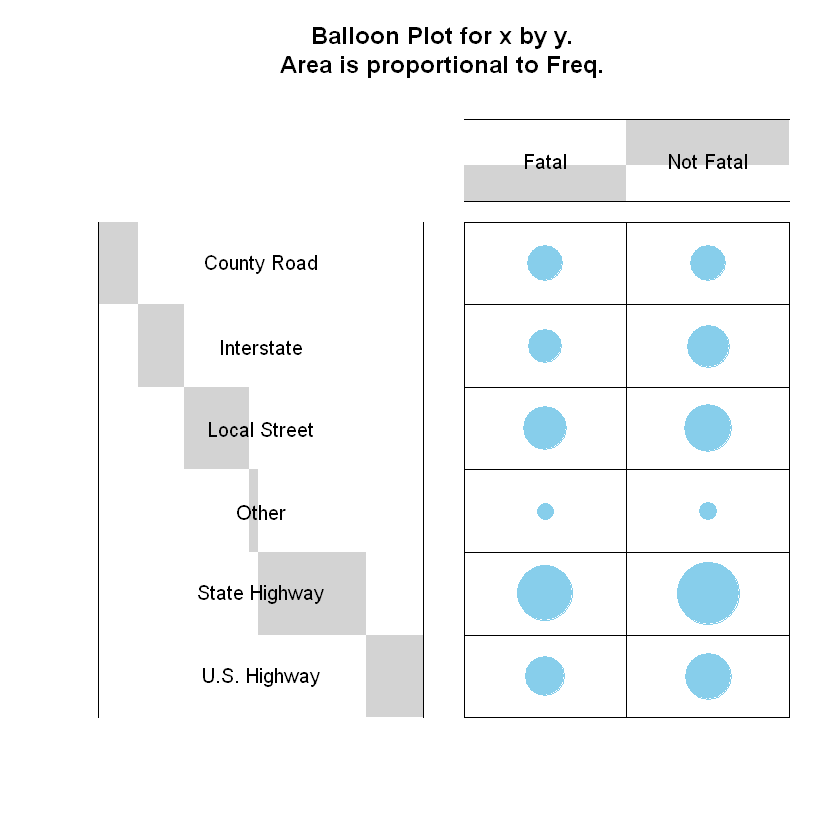

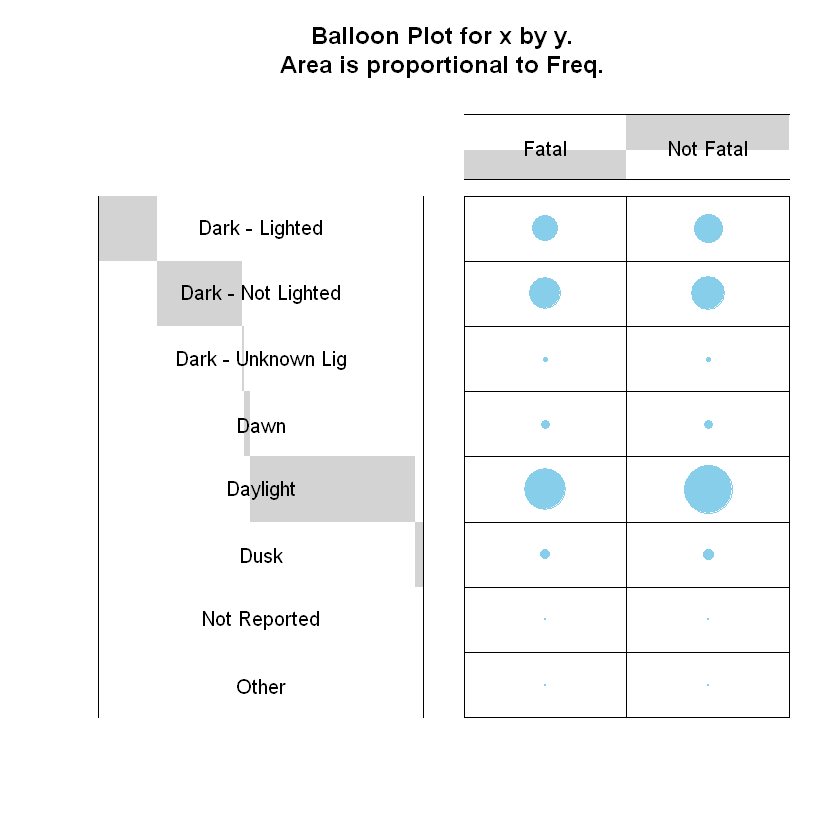

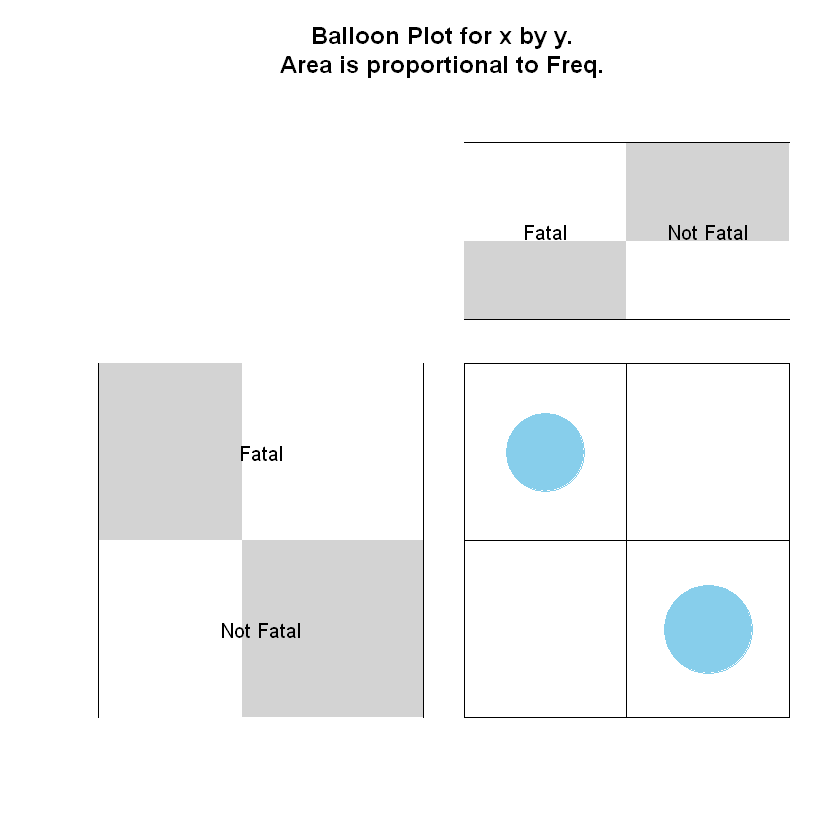

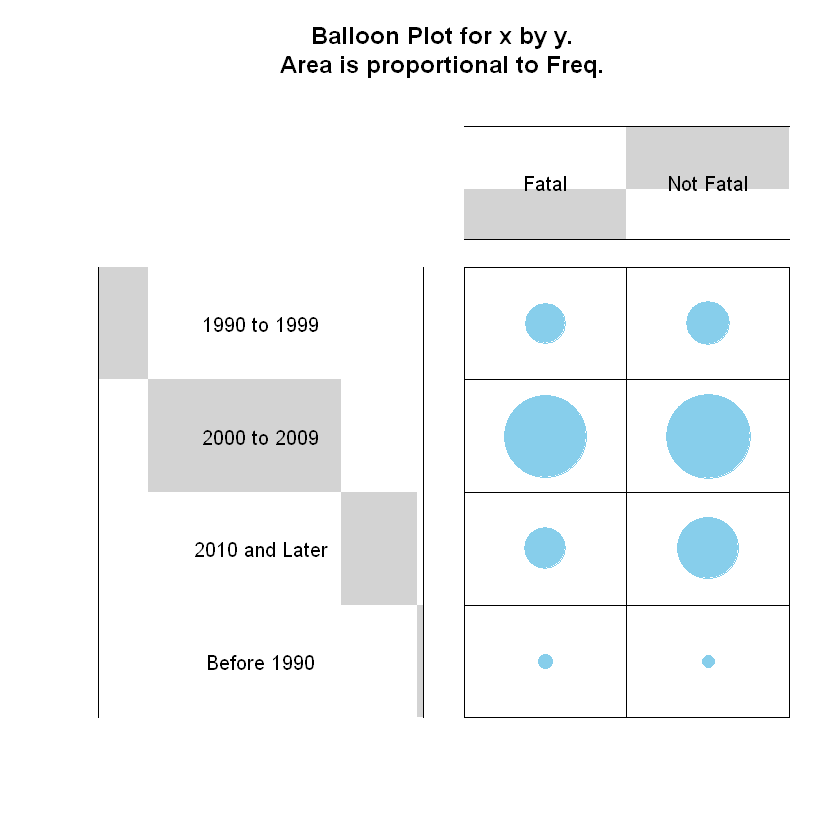

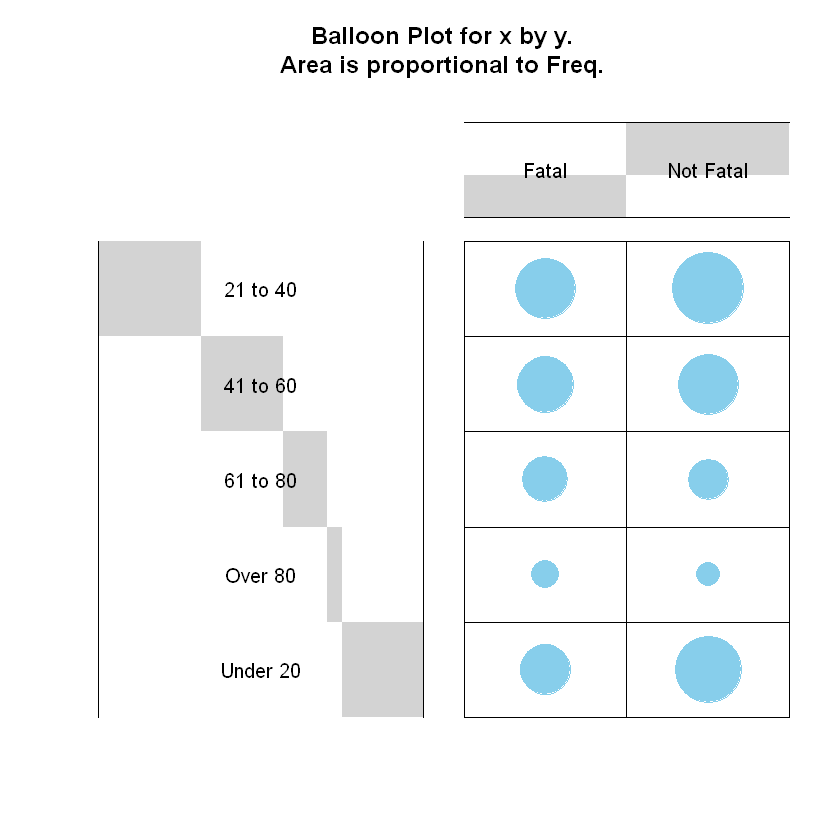

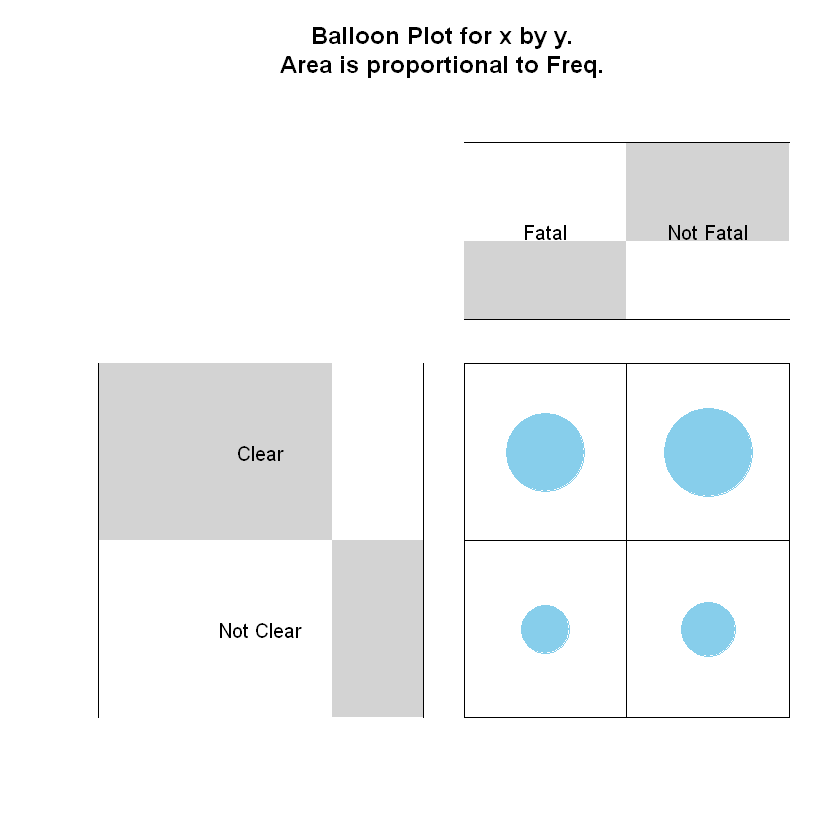

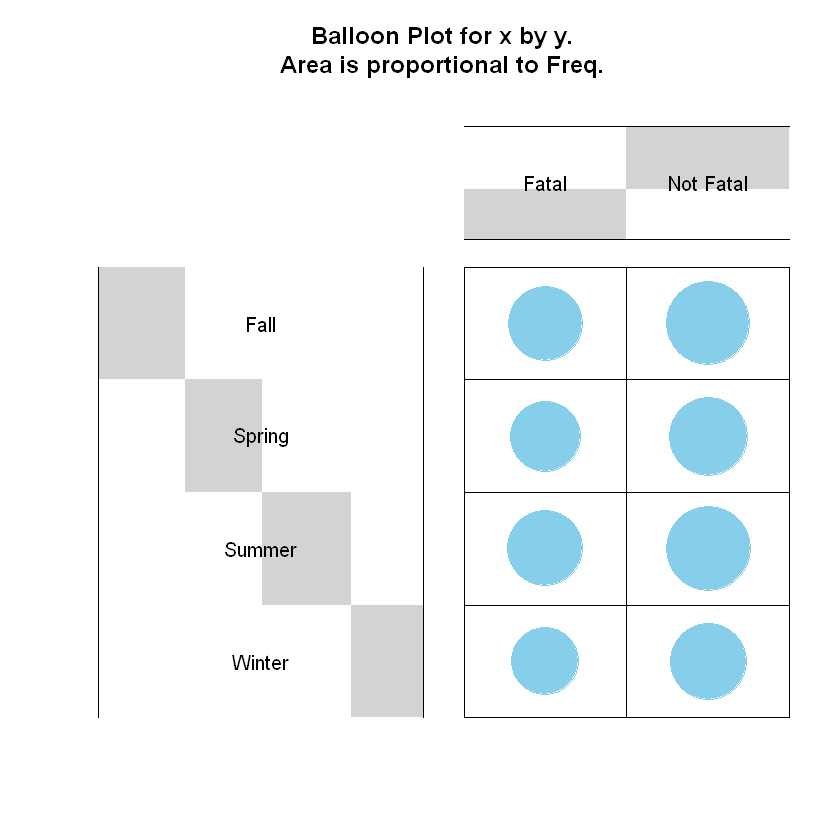

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

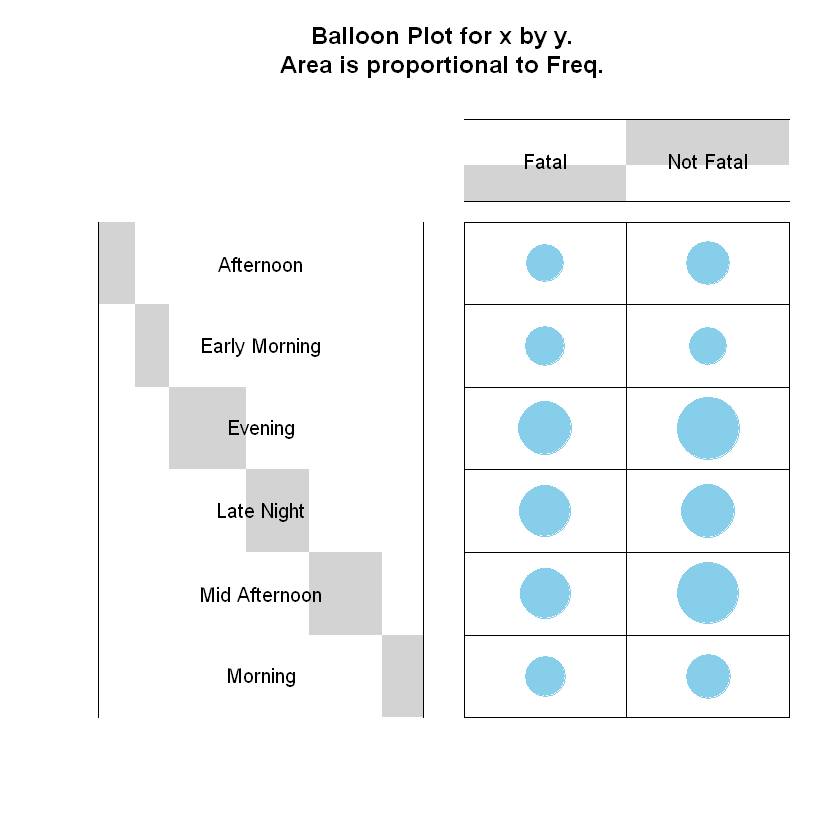

In [10]:
cont.tables <- function(df, target){
  df.factors <- df[,sapply(df,is.factor)]
  
  cat.13 <- function(x)
    {
      l <- (length(unique(x)) < 13)
      return(l)
    }

  df.factors13 <- df.factors[,sapply(df.factors, cat.13)]
 
  m <- matrix(1:((ncol(df.factors13))), nrow=1 ,ncol=(ncol(df.factors13)))
  m[m/m==1] = target
  comb <- combn(names(df.factors13),1)
  combinations <- rbind(m,comb)
  
  tab <- function(d){
    tabl <- table(d[,1], d[,2])
    return(tabl)
  }
  
  f <- function(x){
    tab(df.factors[,x])
  }
  
  tables <- apply(combinations, 2, f)
  return(tables)
}

tables <- cont.tables(accident.clean, "INJ_SEV_new")

lapply(tables, chisq.test)

ballplot <- function(x){
  library(gplots)
  balloonplot(x, label=FALSE, show.margins = FALSE)
}

lapply(tables, ballplot)

### Variable Importance Graph

Loading required package: lattice


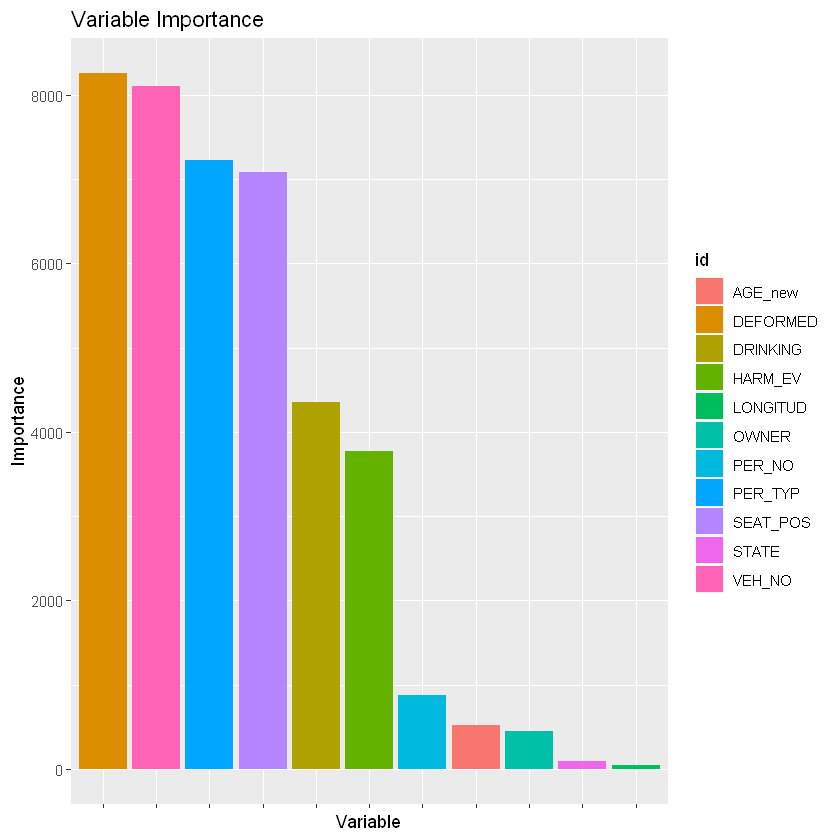

In [11]:
library(rpart)
library(caret)

set.seed(1234)
varImportTree <- rpart(INJ_SEV_new ~ ., data = accident.clean, method = "class")
varImportance <- varImp(varImportTree, scale = TRUE)
var <- rownames(varImportance)
VI <- cbind(id=var, varImportance)
VI <- VI[VI$Overall > 0,]
ggplot(VI) +
  geom_bar(mapping = aes(x = reorder(id, -Overall), y = Overall, fill=id), stat = "identity") +
  ggtitle("Variable Importance") +
  theme(axis.text.x=element_blank()) +
  xlab("Variable") +
  ylab("Importance") 

# v <- as.vector(VI$id)
# accident.important <- accident.clean[c(v,"INJ_SEV_new")]

## Handling Imbalanced Data & Final Clean

In [13]:
accident.clean$MINUTE = NULL
accident.clean$LATITUDE = NULL
accident.clean$LONGITUD = NULL

table(accident.clean$INJ_SEV_new)

library(caret)
set.seed(1000)
balanced <- downSample(x = accident.clean[,-ncol(accident.clean)], y=accident.clean$INJ_SEV_new)
table(balanced$INJ_SEV_new)
balanced$Class = NULL

set.seed(1000)
no.man.balanced <- downSample(x = no.manipulation[,-ncol(no.manipulation)], y=no.manipulation$INJ_SEV_new)



    Fatal Not Fatal 
    35343     44423 


    Fatal Not Fatal 
    35343     35343 

## Pick Random Sample of 1000

In [14]:
set.seed(123)
accident.sample <- balanced[sample(1:nrow(balanced), 1000),]
nrow(accident.sample)

no.man.accident.sample <- no.man.balanced[sample(1:nrow(no.man.balanced), 1000),]

[1] 1000

## Base Model with No Manipulation to Data (Decision Tree)

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


+ Fold01: cp=0.05051 
- Fold01: cp=0.05051 
+ Fold02: cp=0.05051 
- Fold02: cp=0.05051 
+ Fold03: cp=0.05051 
- Fold03: cp=0.05051 
+ Fold04: cp=0.05051 
- Fold04: cp=0.05051 
+ Fold05: cp=0.05051 
- Fold05: cp=0.05051 
+ Fold06: cp=0.05051 
- Fold06: cp=0.05051 
+ Fold07: cp=0.05051 
- Fold07: cp=0.05051 
+ Fold08: cp=0.05051 
- Fold08: cp=0.05051 
+ Fold09: cp=0.05051 
- Fold09: cp=0.05051 
+ Fold10: cp=0.05051 
- Fold10: cp=0.05051 
Aggregating results
Selecting tuning parameters
Fitting cp = 0.0505 on full training set


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Fatal Not Fatal
  Fatal      37.7      20.7
  Not Fatal  12.8      28.8
                           
 Accuracy (average) : 0.665


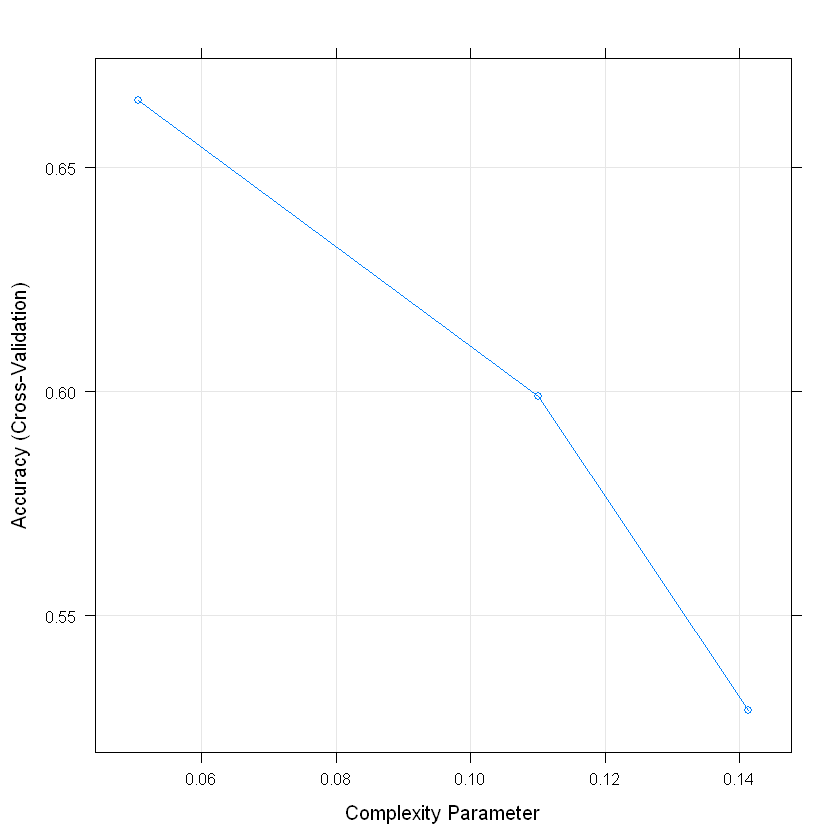

In [15]:
library(caret)
library(rattle)
library(rpart)

accident_tree <- train(Class ~ ., data = no.man.accident.sample, method = "rpart",
                 trControl = trainControl(method = "cv", number = 10, verboseIter = TRUE))

confusionMatrix(accident_tree)
plot(accident_tree)

## Model 1: Decision Tree

+ Fold01: cp=0.06883 
- Fold01: cp=0.06883 
+ Fold02: cp=0.06883 
- Fold02: cp=0.06883 
+ Fold03: cp=0.06883 
- Fold03: cp=0.06883 
+ Fold04: cp=0.06883 
- Fold04: cp=0.06883 
+ Fold05: cp=0.06883 
- Fold05: cp=0.06883 
+ Fold06: cp=0.06883 
- Fold06: cp=0.06883 
+ Fold07: cp=0.06883 
- Fold07: cp=0.06883 
+ Fold08: cp=0.06883 
- Fold08: cp=0.06883 
+ Fold09: cp=0.06883 
- Fold09: cp=0.06883 
+ Fold10: cp=0.06883 
- Fold10: cp=0.06883 
Aggregating results
Selecting tuning parameters
Fitting cp = 0.0688 on full training set


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Fatal Not Fatal
  Fatal      31.8      13.7
  Not Fatal  18.8      35.7
                           
 Accuracy (average) : 0.675


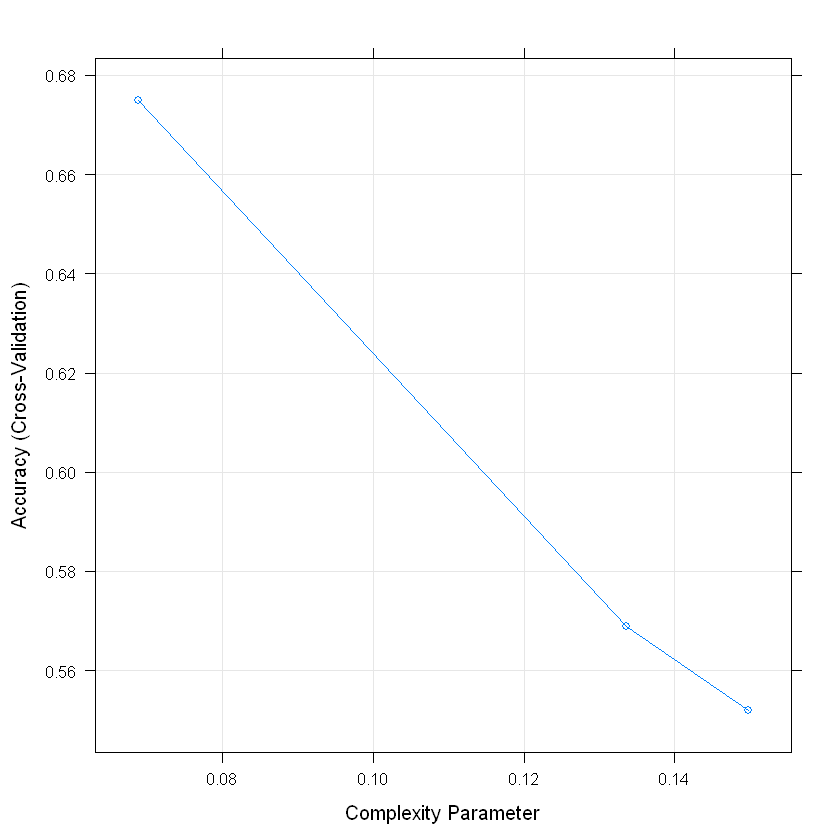

In [16]:
accident_tree <- train(INJ_SEV_new ~ ., data = accident.sample, method = "rpart",
                 trControl = trainControl(method = "cv", number = 10, verboseIter = TRUE))

confusionMatrix(accident_tree)
plot(accident_tree)

## Model 2: Random Forest

+ Fold1: mtry=1, splitrule=gini, min.node.size=1 
- Fold1: mtry=1, splitrule=gini, min.node.size=1 
+ Fold1: mtry=2, splitrule=gini, min.node.size=1 
- Fold1: mtry=2, splitrule=gini, min.node.size=1 
+ Fold1: mtry=3, splitrule=gini, min.node.size=1 
- Fold1: mtry=3, splitrule=gini, min.node.size=1 
+ Fold1: mtry=4, splitrule=gini, min.node.size=1 
- Fold1: mtry=4, splitrule=gini, min.node.size=1 
+ Fold1: mtry=5, splitrule=gini, min.node.size=1 
- Fold1: mtry=5, splitrule=gini, min.node.size=1 
+ Fold1: mtry=6, splitrule=gini, min.node.size=1 
- Fold1: mtry=6, splitrule=gini, min.node.size=1 
+ Fold1: mtry=1, splitrule=gini, min.node.size=2 
- Fold1: mtry=1, splitrule=gini, min.node.size=2 
+ Fold1: mtry=2, splitrule=gini, min.node.size=2 
- Fold1: mtry=2, splitrule=gini, min.node.size=2 
+ Fold1: mtry=3, splitrule=gini, min.node.size=2 
- Fold1: mtry=3, splitrule=gini, min.node.size=2 
+ Fold1: mtry=4, splitrule=gini, min.node.size=2 
- Fold1: mtry=4, splitrule=gini, min.node.size=2 


Cross-Validated (3 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Fatal Not Fatal
  Fatal      34.5       9.8
  Not Fatal  16.1      39.6
                           
 Accuracy (average) : 0.741


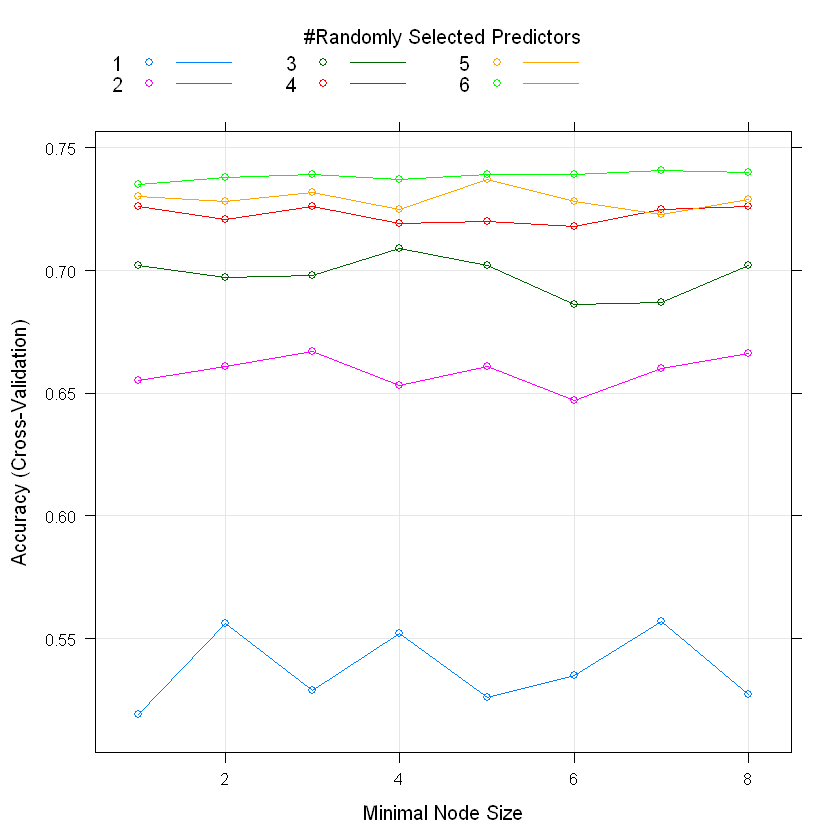

In [18]:
myGrid <- expand.grid(mtry = 1:6,
                      splitrule = "gini",
                      min.node.size = 1:8)

accident_rf <- train(INJ_SEV_new~., data = accident.sample, method = "ranger",
                trControl = trainControl(method = "cv", number = 3, verboseIter = TRUE),
                tuneGrid = myGrid)

confusionMatrix(accident_rf)
plot(accident_rf)

## Model 3: SVM

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

+ Fold1: sigma=0.003957, C=0.25 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold1: sigma=0.003957, C=0.25 
+ Fold1: sigma=0.003957, C=0.50 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold1: sigma=0.003957, C=0.50 
+ Fold1: sigma=0.003957, C=1.00 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold1: sigma=0.003957, C=1.00 
+ Fold2: sigma=0.003957, C=0.25 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold2: sigma=0.003957, C=0.25 
+ Fold2: sigma=0.003957, C=0.50 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold2: sigma=0.003957, C=0.50 
+ Fold2: sigma=0.003957, C=1.00 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold2: sigma=0.003957, C=1.00 
+ Fold3: sigma=0.003957, C=0.25 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold3: sigma=0.003957, C=0.25 
+ Fold3: sigma=0.003957, C=0.50 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold3: sigma=0.003957, C=0.50 
+ Fold3: sigma=0.003957, C=1.00 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold3: sigma=0.003957, C=1.00 
+ Fold4: sigma=0.003957, C=0.25 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold4: sigma=0.003957, C=0.25 
+ Fold4: sigma=0.003957, C=0.50 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold4: sigma=0.003957, C=0.50 
+ Fold4: sigma=0.003957, C=1.00 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold4: sigma=0.003957, C=1.00 
+ Fold5: sigma=0.003957, C=0.25 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold5: sigma=0.003957, C=0.25 
+ Fold5: sigma=0.003957, C=0.50 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold5: sigma=0.003957, C=0.50 
+ Fold5: sigma=0.003957, C=1.00 


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

- Fold5: sigma=0.003957, C=1.00 
Aggregating results
Selecting tuning parameters
Fitting sigma = 0.00396, C = 1 on full training set


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

Cross-Validated (5 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Fatal Not Fatal
  Fatal      29.2      22.4
  Not Fatal  21.4      27.0
                           
 Accuracy (average) : 0.562


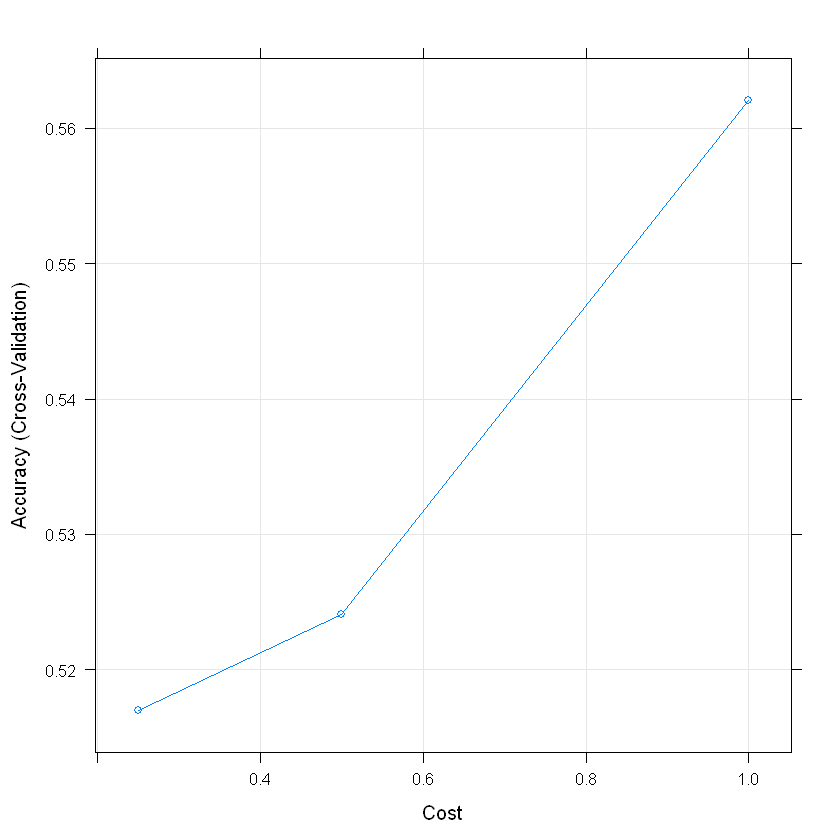

In [19]:
myControl <- trainControl(method = "cv", 
                          number = 5,
                          classProbs = FALSE,
                          verboseIter = TRUE)

accident_SVM <- train(INJ_SEV_new ~ ., accident.sample, 
                            method = "svmRadial", 
                            trControl = myControl)

confusionMatrix(accident_SVM)
plot(accident_SVM)

## Model 4: GLM Net

In [20]:
myControl <- trainControl(method = "cv", 
                          number = 3,
                          classProbs = FALSE,
                          verboseIter = TRUE)

myGrid2 <- expand.grid(alpha = seq(0, 1, .1),
                      lambda = seq(0.001, 2, length = 15))

accident_glmnet <- train(INJ_SEV_new ~ ., accident.sample, 
                            method = "glmnet", 
                            trControl = myControl,
                            tuneGrid = myGrid2)
confusionMatrix(accident_glmnet)
plot(accident_glmnet)

+ Fold1: alpha=0.0, lambda=2 
- Fold1: alpha=0.0, lambda=2 
+ Fold1: alpha=0.1, lambda=2 
- Fold1: alpha=0.1, lambda=2 
+ Fold1: alpha=0.2, lambda=2 
- Fold1: alpha=0.2, lambda=2 
+ Fold1: alpha=0.3, lambda=2 
- Fold1: alpha=0.3, lambda=2 
+ Fold1: alpha=0.4, lambda=2 
- Fold1: alpha=0.4, lambda=2 
+ Fold1: alpha=0.5, lambda=2 
- Fold1: alpha=0.5, lambda=2 
+ Fold1: alpha=0.6, lambda=2 
- Fold1: alpha=0.6, lambda=2 
+ Fold1: alpha=0.7, lambda=2 
- Fold1: alpha=0.7, lambda=2 
+ Fold1: alpha=0.8, lambda=2 
- Fold1: alpha=0.8, lambda=2 
+ Fold1: alpha=0.9, lambda=2 
- Fold1: alpha=0.9, lambda=2 
+ Fold1: alpha=1.0, lambda=2 
- Fold1: alpha=1.0, lambda=2 
+ Fold2: alpha=0.0, lambda=2 
- Fold2: alpha=0.0, lambda=2 
+ Fold2: alpha=0.1, lambda=2 
- Fold2: alpha=0.1, lambda=2 
+ Fold2: alpha=0.2, lambda=2 
- Fold2: alpha=0.2, lambda=2 
+ Fold2: alpha=0.3, lambda=2 
- Fold2: alpha=0.3, lambda=2 
+ Fold2: alpha=0.4, lambda=2 
- Fold2: alpha=0.4, lambda=2 
+ Fold2: alpha=0.5, lambda=2 
- Fold2: a

## Final Model (Random Forest)

In [22]:
myGrid <- expand.grid(mtry = 5:6,
                      splitrule = "gini",
                      min.node.size = 4:5)

accident_rf <- train(INJ_SEV_new~., data = accident.clean, method = "ranger",
                trControl = trainControl(method = "cv", number = 4, verboseIter = TRUE),
                tuneGrid = myGrid)

confusionMatrix(accident_rf)

+ Fold1: mtry=5, splitrule=gini, min.node.size=4 
- Fold1: mtry=5, splitrule=gini, min.node.size=4 
+ Fold1: mtry=6, splitrule=gini, min.node.size=4 
- Fold1: mtry=6, splitrule=gini, min.node.size=4 
+ Fold1: mtry=5, splitrule=gini, min.node.size=5 
- Fold1: mtry=5, splitrule=gini, min.node.size=5 
+ Fold1: mtry=6, splitrule=gini, min.node.size=5 
- Fold1: mtry=6, splitrule=gini, min.node.size=5 
+ Fold2: mtry=5, splitrule=gini, min.node.size=4 
- Fold2: mtry=5, splitrule=gini, min.node.size=4 
+ Fold2: mtry=6, splitrule=gini, min.node.size=4 
- Fold2: mtry=6, splitrule=gini, min.node.size=4 
+ Fold2: mtry=5, splitrule=gini, min.node.size=5 
- Fold2: mtry=5, splitrule=gini, min.node.size=5 
+ Fold2: mtry=6, splitrule=gini, min.node.size=5 
- Fold2: mtry=6, splitrule=gini, min.node.size=5 
+ Fold3: mtry=5, splitrule=gini, min.node.size=4 
- Fold3: mtry=5, splitrule=gini, min.node.size=4 
+ Fold3: mtry=6, splitrule=gini, min.node.size=4 
- Fold3: mtry=6, splitrule=gini, min.node.size=4 


Cross-Validated (4 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Fatal Not Fatal
  Fatal      27.2       5.7
  Not Fatal  17.1      50.0
                           
 Accuracy (average) : 0.772
